<a href="https://colab.research.google.com/github/danielmuzyk/MachineLearning/blob/main/ML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predicting whether a patient has heart disease or not***

# ***Comparing standard classification algorithms to XGBoost***

# ***dataset description***

> data comes from : https://www.kaggle.com/ronitf/heart-disease-uci

**age**:    The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
np.set_printoptions(precision=4, suppress=True)


In [2]:
# loading dataset

data = pd.read_csv("heart_disease.csv")
data_copy = data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# percent of missing values in our columns


for col in data.columns:

    print(f" {data[col].isnull().sum() * 100} %")

print(f"amount of missing values : {data.isnull().sum().sum()}")

 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
 0 %
amount of missing values : 0


In [4]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [7]:
data["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

In [8]:
# types of data

unique = {column: len(data[column].unique()) for column in data.columns}
unique

{'age': 41,
 'ca': 5,
 'chol': 152,
 'cp': 4,
 'exang': 2,
 'fbs': 2,
 'oldpeak': 40,
 'restecg': 3,
 'sex': 2,
 'slope': 3,
 'target': 2,
 'thal': 4,
 'thalach': 91,
 'trestbps': 49}

In [9]:
categorical_feature_array = { column: data[column].unique() for column in data.columns if len(data[column].unique()) < 6}
categorical_feature_array

{'ca': array([0, 2, 1, 3, 4]),
 'cp': array([3, 2, 1, 0]),
 'exang': array([0, 1]),
 'fbs': array([1, 0]),
 'restecg': array([0, 1, 2]),
 'sex': array([1, 0]),
 'slope': array([0, 2, 1]),
 'target': array([1, 0]),
 'thal': array([1, 2, 3, 0])}

In [10]:
# Taking into consideration lines of code above and documentatnion for our dataset it turns out :
# dataset includes 5 numerical data (4 continuous data, 1 discrete data(age)) and 9 categorical data
# Let's print it out:

for key in categorical_feature_array.keys():
    print(f"{key}: categorical")

for col in data.columns:
    if len(data[col].unique()) > 7:
        print(f"{col}: numerical")

sex: categorical
cp: categorical
fbs: categorical
restecg: categorical
exang: categorical
slope: categorical
ca: categorical
thal: categorical
target: categorical
age: numerical
trestbps: numerical
chol: numerical
thalach: numerical
oldpeak: numerical


In [11]:
numerical_features = ["age", "chol", "oldpeak", "thalach", "trestbps"]

In [12]:
# let's take a closer look at numerical data

data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0


In [13]:
data[numerical_features].columns

Index(['age', 'chol', 'oldpeak', 'thalach', 'trestbps'], dtype='object')

In [14]:
# detecting outliners

for i in range(len(data[numerical_features].columns)):
    fig = px.box(data[numerical_features], y=numerical_features[i])
    fig.show()

In [15]:
numerical_features_2 = [ "chol", "oldpeak", "thalach", "trestbps"]

numerical_features_2

['chol', 'oldpeak', 'thalach', 'trestbps']

In [16]:
numerical_features

['age', 'chol', 'oldpeak', 'thalach', 'trestbps']

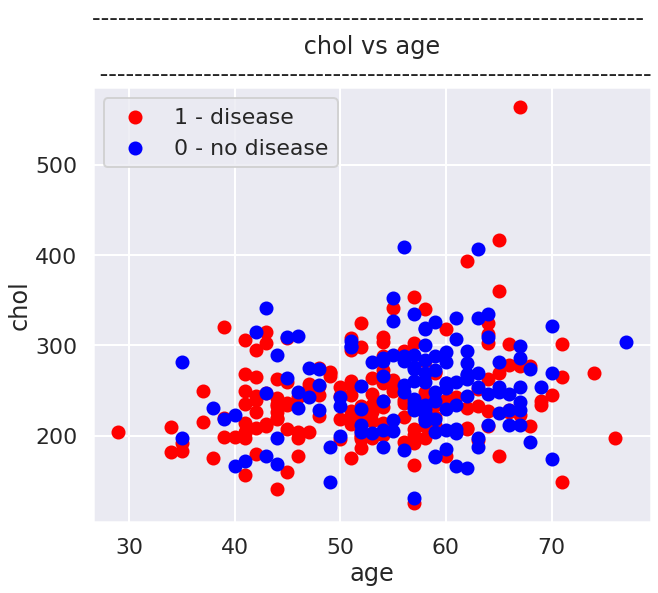

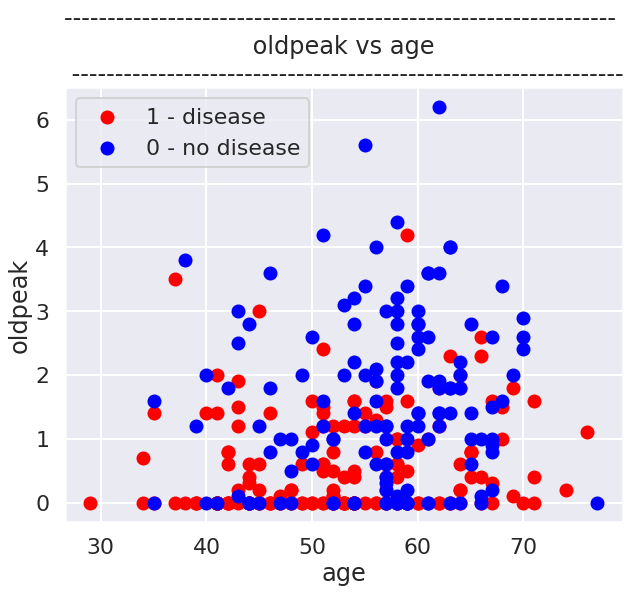

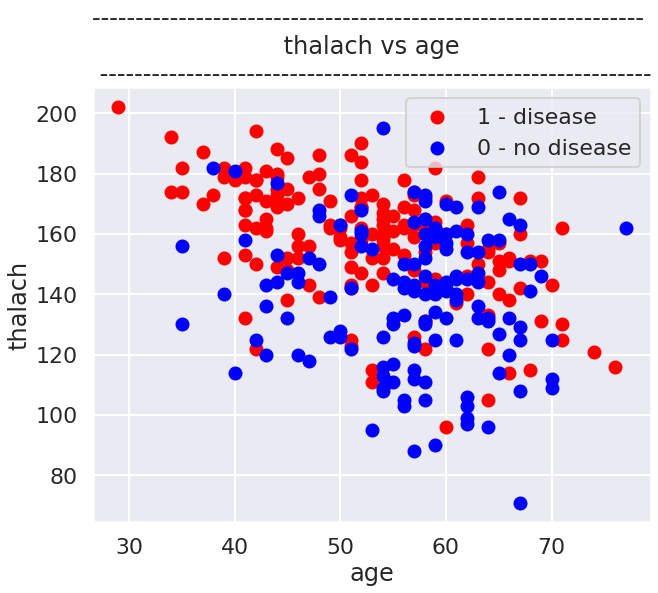

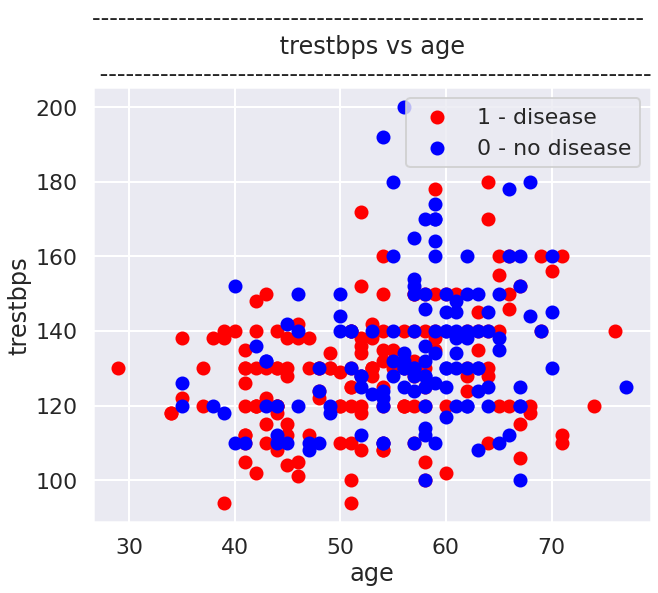

In [17]:
for col in data[numerical_features_2].columns:

    sns.set_style("darkgrid")
    sns.set_context("poster")
    plt.figure(figsize=(10,8))
    plt.scatter(data.age[data.target == 1],
            data[numerical_features_2][col][data.target == 1],
            c='red')

    plt.scatter(data.age[data.target == 0],
            data[numerical_features_2][col][data.target == 0],
            c='blue')
    
    plt.title(f"---------------------------------------------------------------- \n {col} vs age \n ----------------------------------------------------------------")
    plt.ylabel(f"{col}")
    plt.xlabel("age")
    plt.legend(["1 - disease", "0 - no disease"], loc="best")
    
    
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



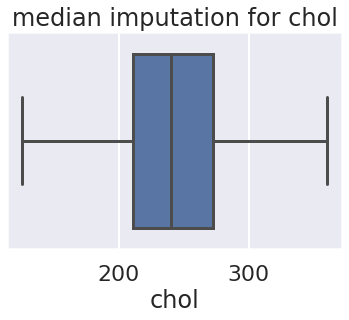

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



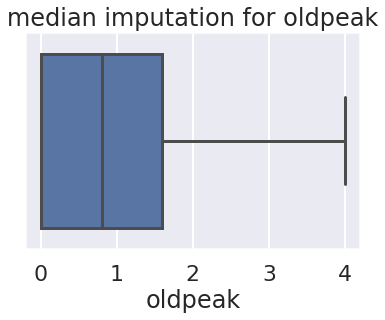

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



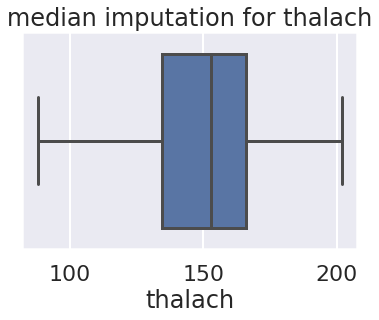

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



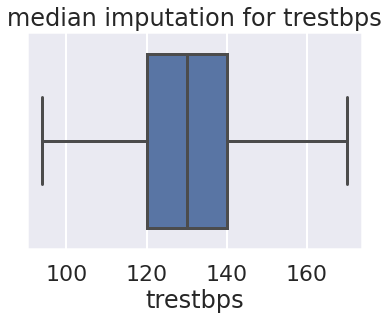

In [18]:
# let's use median imputation to remove outliners

data_with_outliners = ["chol", "oldpeak", "thalach", "trestbps"]

for feature in data_with_outliners:

    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    med = np.median(data[feature])

    for i in data[feature]:
        if i > upper_tail or i < lower_tail:
            data[feature] = data[feature].replace(i, med)

    sns.boxplot(data[feature])
    plt.title(f"median imputation for {feature}")
    plt.show()


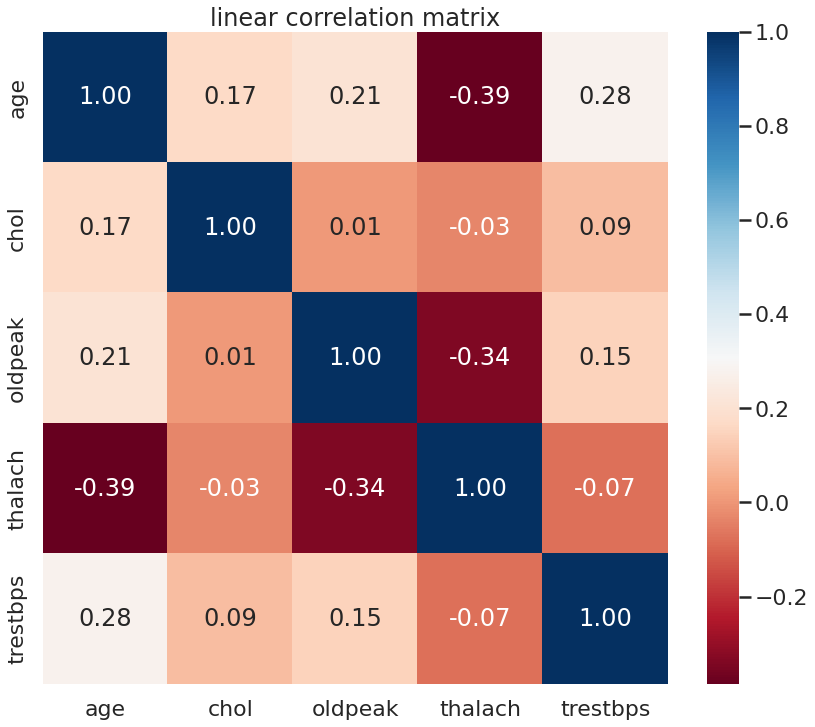

In [19]:
# Linear correlation between numerical data

linear_corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(14,12))
plt.title("linear correlation matrix")
sns.heatmap(linear_corr_matrix, annot=True, cmap="RdBu", fmt='.2f')

In [20]:
# let's create the function which returns highly linear correlated features in a set
# useful function if there are lot's of numerical features in our dataset and we give annot param as false 

def find_highly_correlated_features(data, limes):
    """this function finds higly correlated features
    params: data - your dataset, limes - value in range (0, 1) indicates absolute value for treshold of correlation """
    features=[]
    linear_corr_matrix = data.corr()
    for i in range(len(linear_corr_matrix)):
        for j in range(i):
            if abs(linear_corr_matrix.iloc[i, j]) > limes:
                column_name = linear_corr_matrix.columns[i]
                features.append(colum_name)
    return features

In [21]:
find_highly_correlated_features(data[numerical_features], 0.8)

[]

In [22]:
# the line of code above indicates that there is no linear correlation between numerical data
#  so discover whether there is any non-linear correlations between them 

from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(data[numerical_features_2], height=height, aspect=aspect)

interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))


interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

In [23]:
# It looks like there is no non-linear correlation between numerical features

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1


In [25]:
data_2 = data.copy()
data_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1


In [27]:
# standarizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_2[numerical_features] = scaler.fit_transform(data_2[numerical_features])
data_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.987461,-0.229564,1,0,0.007165,0,1.274733,0,0,1,1
1,-1.928548,1,2,-0.004379,0.152039,0,1,1.657982,0,2.429065,0,0,2,1
2,-1.485726,0,1,-0.004379,-0.880534,0,0,0.988732,0,0.408985,2,0,2,1
3,0.174856,1,1,-0.665606,-0.162222,0,1,1.256432,0,-0.168181,2,0,2,1
4,0.285561,0,0,-0.665606,2.486552,0,1,0.587182,1,-0.360569,2,0,2,1


In [28]:
data_2 = pd.get_dummies(data_2, columns = ['cp', 'ca', 'restecg', 'slope', 'thal'], drop_first = True)
data_2.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,ca_4,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.949794,1,0.987461,-0.229564,1,0.007165,0,1.274733,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.004379,0.152039,0,1.657982,0,2.429065,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,-1.485726,0,-0.004379,-0.880534,0,0.988732,0,0.408985,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.174856,1,-0.665606,-0.162222,0,1.256432,0,-0.168181,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0
4,0.285561,0,-0.665606,2.486552,0,0.587182,1,-0.360569,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [30]:
from sklearn.model_selection import train_test_split
np.random.seed(29)

X_2 = data_2.drop('target', axis=1)
y_2 = data_2['target']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)

print(f'X_train set shape = {X_train_2.shape}')
print(f'X_test set shape = {X_test_2.shape}')
print(f'y_train set shape = {y_train_2.shape}')
print(f'y_test set shape = {y_test_2.shape}')

X_train set shape = (241, 22)
X_test set shape = (61, 22)
y_train set shape = (241,)
y_test set shape = (61,)


In [31]:
print(f'y_train values : {y_train_2.value_counts()}')
print(f'y_test values : {y_test_2.value_counts()}')

y_train values : 1    132
0    109
Name: target, dtype: int64
y_test values : 1    32
0    29
Name: target, dtype: int64


In [32]:
# Model Choices

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [39]:
# Let's create function to fit and score the above models, using cross validation

models_ML = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SupportVectorMachine": SVC()}

def fit_score_crossval(model, X, y, folds):

    """The fit_score_crossval function return mean score for models (default params) in the above dictionary taking 
    into consideration X, y, and k-fold."""

    np.random.seed(11)
    model_scores = {}

    for name, model in models_ML.items():

        scores = cross_val_score(estimator=model, X=X, y=y, cv=folds)
        model_scores[name] = np.mean(scores)*100

    return model_scores

In [40]:
fit_score_crossval(model=models_ML, X=X_2, y=y_2, folds=9 )

{'DecisionTree': 72.51931075460489,
 'KNN': 81.09526638938404,
 'LogisticRegression': 85.38324420677363,
 'RandomForest': 79.7583679936621,
 'SupportVectorMachine': 80.12477718360071}